In [1]:
!pip install yfinance pandas numpy matplotlib seaborn plotly
!pip install scikit-learn statsmodels
!pip install prophet
!pip install tensorflow keras
!pip install streamlit

In [148]:
# Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [152]:
tcs.reset_index(inplace=True)
tcs.to_csv("data/tcs_stock.csv", index=False)

In [150]:
# Download Stock Data (TCS - Tata Consultancy Services)
tcs = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
tcs.to_csv("data/tcs_stock.csv")  # Save for later use

[*********************100%***********************]  1 of 1 completed


In [43]:
# Explore the Dataset
print(tcs.head())
print(tcs.info())
print(tcs.describe())


Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2019-01-01  1693.197388  1699.604229  1677.358101  1687.146397  1094883
2019-01-02  1711.439209  1721.360895  1690.705774  1695.154999  2100463
2019-01-03  1690.660889  1730.703912  1684.565472  1707.612479  2611668
2019-01-04  1670.105713  1691.773419  1638.204789  1690.705648  4280862
2019-01-07  1688.837036  1698.536369  1673.798632  1683.409003  1856423
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2019-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   1480 non-null   float64
 1   (High, TCS.NS)    1480 non-null   float64
 2   (Low, TCS.NS)     1480 non-null   float64
 3   (Open, TCS.NS)    1480 non-null   float64
 4   (Volume, TCS.

In [45]:
# Check for missing values
print(tcs.isnull().sum())

Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64


In [47]:
# Reset index for plotting
tcs.reset_index(inplace=True)

In [49]:
# Fill missing values forward
tcs.fillna(method='ffill', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2988\2808071676.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tcs.fillna(method='ffill', inplace=True)


In [51]:
# Set 'Date' column as index again
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.set_index('Date', inplace=True)

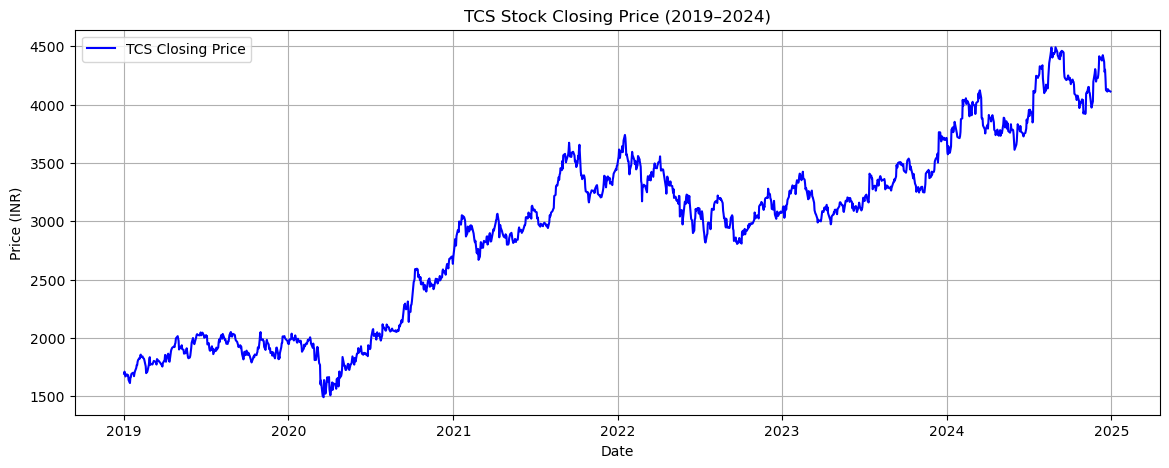

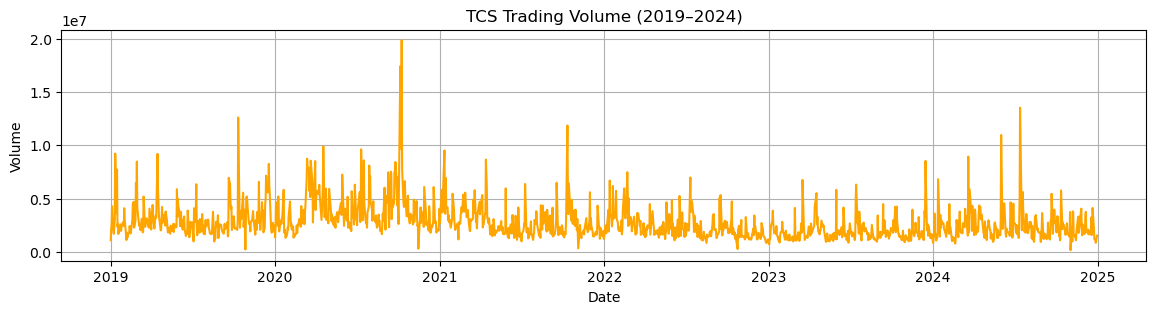

In [31]:
# Plot closing price
plt.figure(figsize=(14, 5))
plt.plot(tcs['Close'], label='TCS Closing Price', color='blue')
plt.title('TCS Stock Closing Price (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot volume
plt.figure(figsize=(14, 3))
plt.plot(tcs['Volume'], color='orange')
plt.title('TCS Trading Volume (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# ARIMA model

In [53]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(tcs['Close'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.0922405878947519
p-value: 0.7181563284732438
Critical Values:
   1%: -3.434779131760461
   5%: -2.863496173799589
   10%: -2.5678114464207265


In [55]:
# Interpretation
if result[1] <= 0.05:
    print("\n✅ The series is stationary. Proceed with ARIMA.")
else:
    print("\n❌ The series is NOT stationary. Differencing is required.")


❌ The series is NOT stationary. Differencing is required.


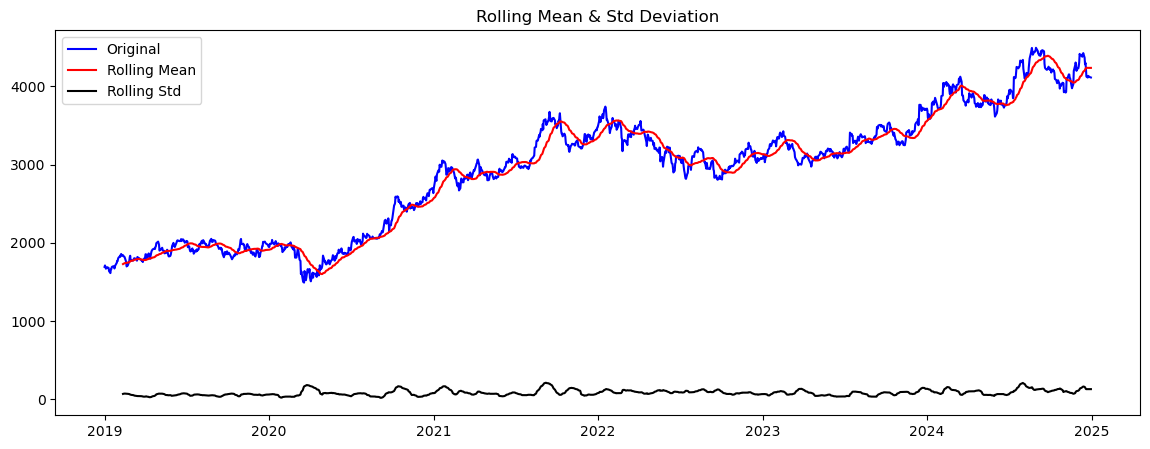

In [57]:
rolling_mean = tcs['Close'].rolling(window=30).mean()
rolling_std = tcs['Close'].rolling(window=30).std()

plt.figure(figsize=(14,5))
plt.plot(tcs['Close'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Std Deviation')
plt.legend()
plt.show()

In [59]:
# First difference
tcs_diff = tcs['Close'].diff().dropna()

# ADF test after differencing
result_diff = adfuller(tcs_diff)
print("ADF Statistic after differencing:", result_diff[0])
print("p-value:", result_diff[1])


ADF Statistic after differencing: -37.723782047211145
p-value: 0.0


<Figure size 1200x400 with 0 Axes>

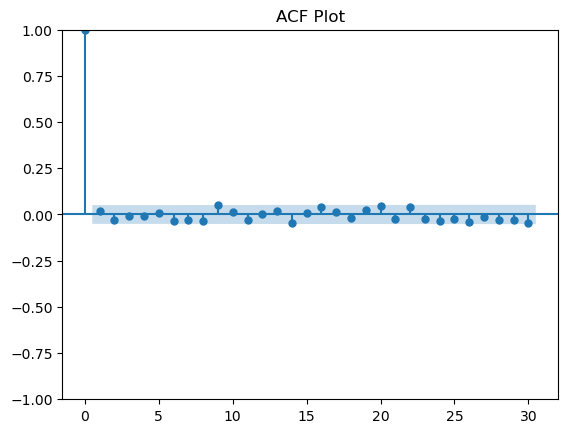

<Figure size 1200x400 with 0 Axes>

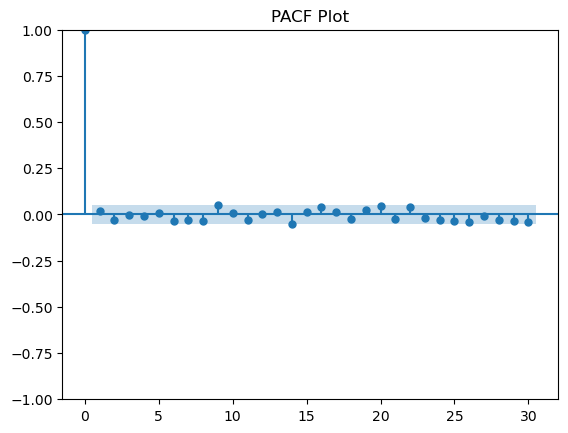

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(tcs_diff, lags=30)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(tcs_diff, lags=30)
plt.title("PACF Plot")
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
model = ARIMA(tcs['Close'], order=(5,1,2))
model_fit = model.fit()

# Summary
print(model_fit.summary())


C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1480
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -7623.336
Date:                Sun, 22 Jun 2025   AIC                          15262.672
Time:                        20:49:24   BIC                          15305.065
Sample:                             0   HQIC                         15278.476
                               - 1480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8687      0.064    -29.276      0.000      -1.994      -1.744
ar.L2         -0.9489      0.074    -12.828      0.000      -1.094      -0.804
ar.L3         -0.0512      0.055     -0.924      0.3

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


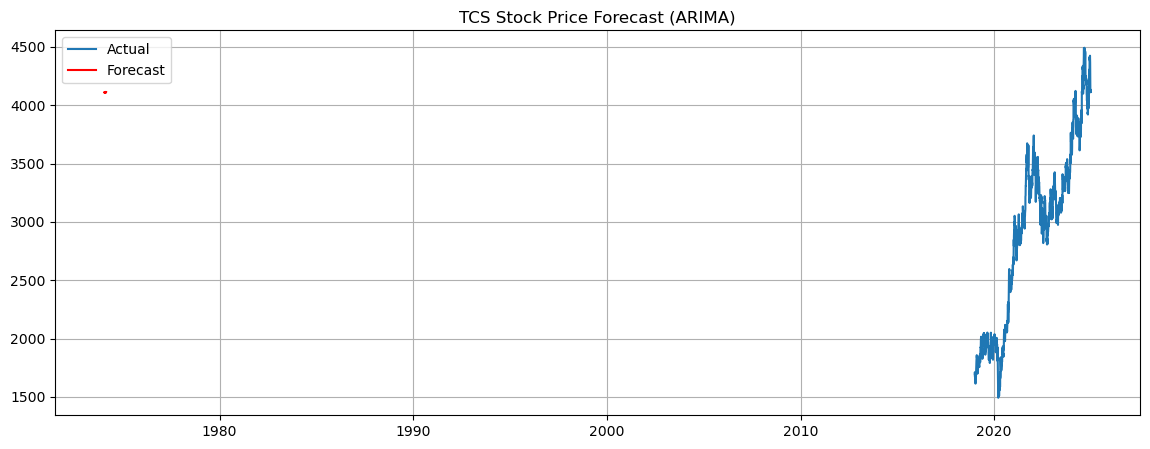

In [65]:
# Forecast future prices
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(14,5))
plt.plot(tcs['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('TCS Stock Price Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal ARIMA (SARIMA)

In [67]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 5.4 MB/s eta 0:00:00


In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Fit SARIMA model
sarima_model = SARIMAX(tcs['Close'],
                       order=(2, 1, 2),
                       seasonal_order=(1, 1, 1, 30),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Summary
print(sarima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               TCS.NS   No. Observations:                 1480
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood               -7355.215
Date:                              Sun, 22 Jun 2025   AIC                          14724.431
Time:                                      21:37:11   BIC                          14761.220
Sample:                                           0   HQIC                         14738.176
                                             - 1480                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0987      0.129      0.762      0.446      -0.155       0.352
ar.L2          0.79

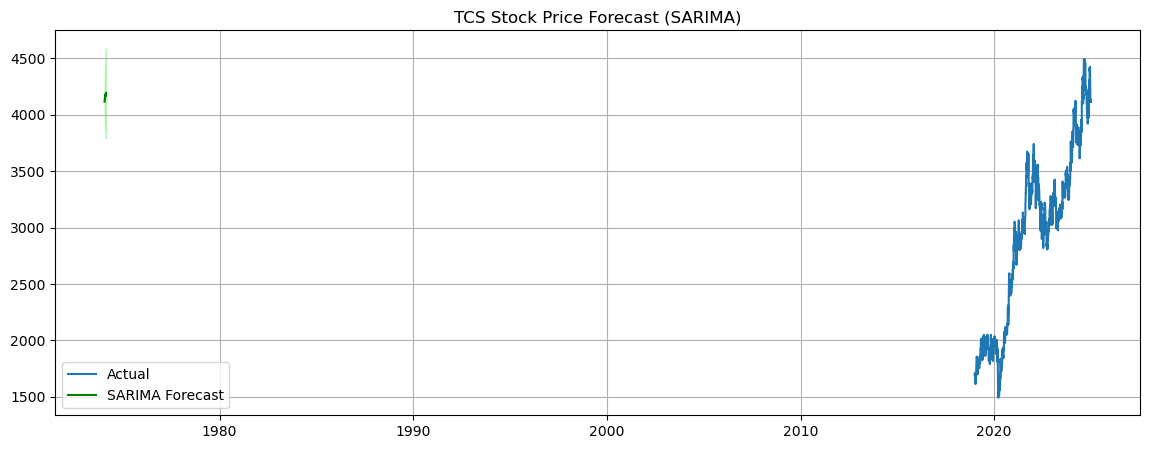

In [73]:
# Forecast next 30 days
forecast_sarima = sarima_result.get_forecast(steps=30)
predicted_mean = forecast_sarima.predicted_mean
conf_int = forecast_sarima.conf_int()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(tcs['Close'], label='Actual')
plt.plot(predicted_mean.index, predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.title('TCS Stock Price Forecast (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example: Simple train-test split
train = tcs['Close'][:-30]
test = tcs['Close'][-30:]

# Refit on train
sarima_model = SARIMAX(train,
                       order=(2, 1, 2),
                       seasonal_order=(1, 1, 1, 30),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Predict for test range
sarima_forecast = sarima_result.forecast(steps=30)

# Metrics
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
mae = mean_absolute_error(test, sarima_forecast)

print("SARIMA RMSE:", rmse)
print("SARIMA MAE:", mae)

SARIMA RMSE: 157.1998057060267
SARIMA MAE: 132.2860402075425


# Prophet Model

In [77]:
!pip install prophet


In [79]:
from prophet import Prophet

In [81]:
# Reset index to get Date column
prophet_data = tcs.reset_index()[['Date', 'Close']]
prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

prophet_data.head()

Price,ds,y
Ticker,,TCS.NS
0,2019-01-01,1693.197388
1,2019-01-02,1711.439209
2,2019-01-03,1690.660889
3,2019-01-04,1670.105713
4,2019-01-07,1688.837036


In [97]:
# Start from scratch - reset everything
import pandas as pd
import numpy as np
from prophet import Prophet

# STEP 2: Load original data again (if needed)
# If 'tcs' is not already defined, re-load it
# If already available, skip this block
# Uncomment below if needed
# import yfinance as yf
# tcs = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

# Reset index and copy Date and Close
df_prophet = tcs.reset_index()[['Date', 'Close']].copy()

# Show columns before renaming
print("Before renaming:", df_prophet.columns)

#: Rename columns to Prophet format
df_prophet.columns = ['ds', 'y']

# Show column names after renaming
print("After renaming:", df_prophet.columns)

# Head of data
print("First few rows:\n", df_prophet.head())

# Clean and typecast
df_prophet = df_prophet.dropna()
df_prophet = df_prophet[df_prophet['y'].apply(lambda x: isinstance(x, (int, float)))]
df_prophet['y'] = df_prophet['y'].astype(float)

# Final confirmation before fit
print("Cleaned df:\n", df_prophet.head())

# Fit the Prophet model
model = Prophet()
model.fit(df_prophet)

Before renaming: MultiIndex([( 'Date',       ''),
            ('Close', 'TCS.NS')],
           names=['Price', 'Ticker'])
After renaming: Index(['ds', 'y'], dtype='object')
First few rows:
           ds            y
0 2019-01-01  1693.197388
1 2019-01-02  1711.439209
2 2019-01-03  1690.660889
3 2019-01-04  1670.105713
4 2019-01-07  1688.837036
Cleaned df:
           ds            y
0 2019-01-01  1693.197388
1 2019-01-02  1711.439209
2 2019-01-03  1690.660889
3 2019-01-04  1670.105713
4 2019-01-07  1688.837036


21:49:29 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
# Create future dates
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1505,2025-01-25,4680.935571,4537.626637,4815.828473
1506,2025-01-26,4715.304201,4572.501057,4852.966237
1507,2025-01-27,4627.869609,4489.614824,4769.764890
1508,2025-01-28,4633.748218,4507.541880,4774.942756
1509,2025-01-29,4638.035915,4493.813248,4771.517278


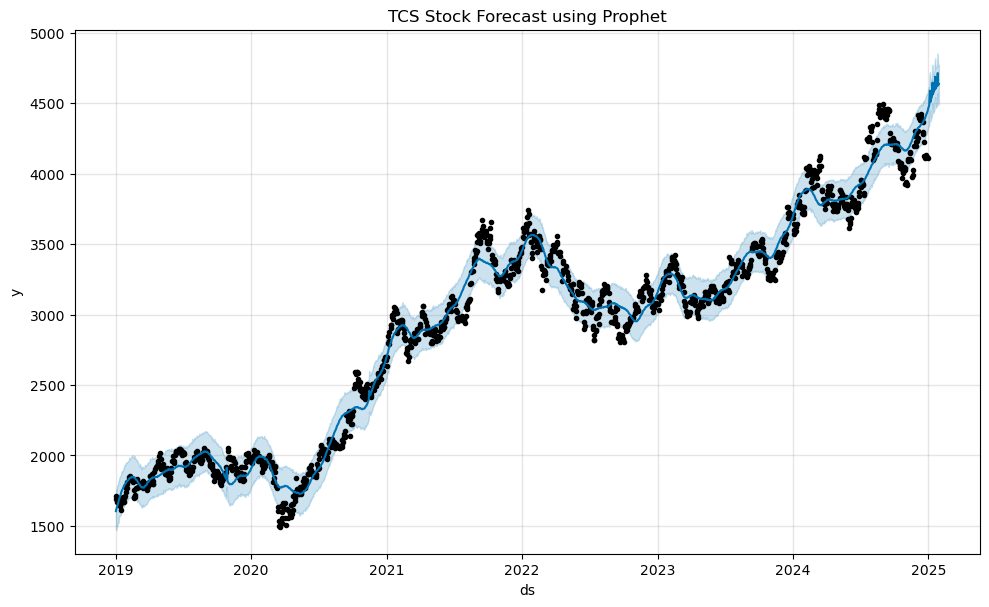

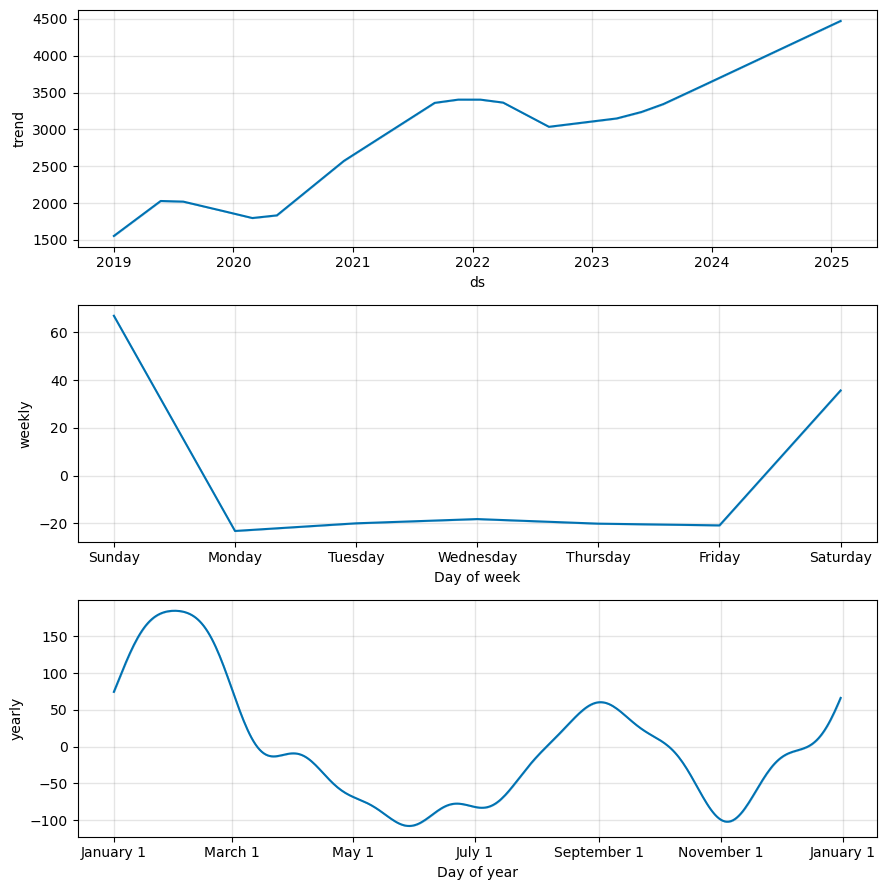

In [101]:
# Plot forecast
model.plot(forecast)
plt.title('TCS Stock Forecast using Prophet')
plt.show()

# Plot components (trend, seasonality, holidays)
model.plot_components(forecast)
plt.show()

In [103]:
# Compare last 30 actual vs predicted
actual = prophet_data['y'][-30:].reset_index(drop=True)
predicted = forecast['yhat'][-60:-30].reset_index(drop=True)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("Prophet MAE:", mae)
print("Prophet RMSE:", rmse)

Prophet MAE: 126.89245738151307
Prophet RMSE: 164.21997473495782


# Forecasting with LSTM (Deep Learning)

In [109]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [111]:
# Use Close prices
close_data = tcs[['Close']].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Visual check
print(scaled_data[:5])

[[0.06698766]
 [0.0730689 ]
 [0.06614207]
 [0.05928963]
 [0.06553406]]


In [113]:
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1420, 60, 1)
y shape: (1420,)


In [115]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0711 - val_loss: 0.0094
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.6143e-04 - val_loss: 0.0020
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.9361e-04 - val_loss: 0.0017
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.7550e-04 - val_loss: 0.0023
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 9.1701e-04 - val_loss: 0.0016
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 8.2626e-04 - val_loss: 0.0016
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.9269e-04 - val_loss: 0.0024
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.6002e-04 - val_loss: 0.0015
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 7.3809e-04 - val_loss: 0.0039


In [117]:
# Predict on last part of data
test_input = scaled_data[-sequence_length:]
test_input = test_input.reshape(1, sequence_length, 1)

# Predict next value (next day)
predicted_scaled = model.predict(test_input)
predicted_price = scaler.inverse_transform(predicted_scaled)

print("Next Day Predicted Price (LSTM): ₹", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
Next Day Predicted Price (LSTM): ₹ 4039.3599


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


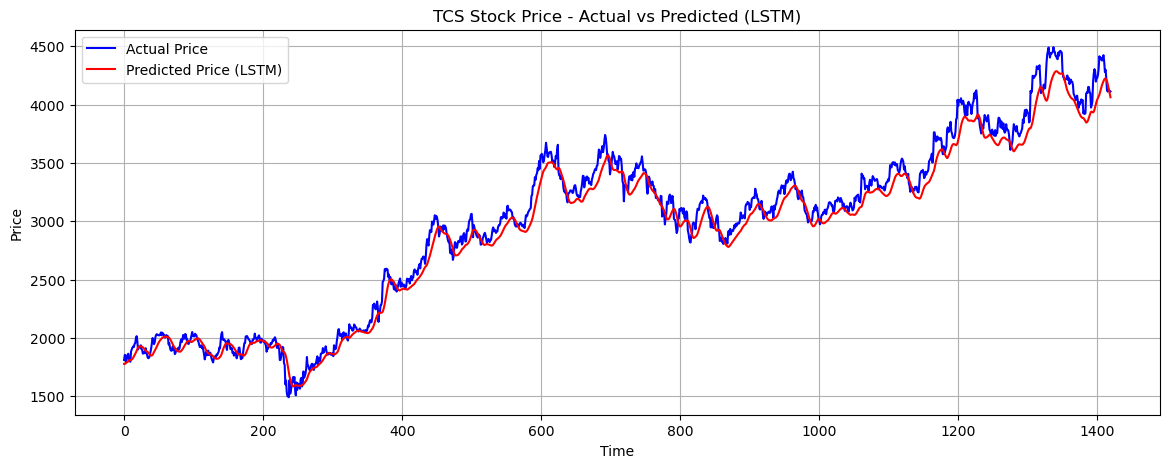

In [119]:
predicted_train = model.predict(X)
predicted_train = scaler.inverse_transform(predicted_train)
true_train = scaler.inverse_transform(y.reshape(-1,1))

# Plot
plt.figure(figsize=(14,5))
plt.plot(true_train, label="Actual Price", color='blue')
plt.plot(predicted_train, label="Predicted Price (LSTM)", color='red')
plt.title("TCS Stock Price - Actual vs Predicted (LSTM)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [121]:
rmse = np.sqrt(mean_squared_error(true_train, predicted_train))
mae = mean_absolute_error(true_train, predicted_train)

print("LSTM RMSE:", rmse)
print("LSTM MAE:", mae)

LSTM RMSE: 113.70522590065171
LSTM MAE: 89.50858162893375


# Compare All Models (ARIMA, SARIMA, Prophet, LSTM)

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return rmse, mae, mape

In [125]:
# Define test data (last 30 actual Close values)
test_actual = tcs['Close'][-30:].values.reshape(-1, 1)

In [127]:
arima_forecast = model_fit.forecast(steps=30).values.reshape(-1, 1)

In [129]:
sarima_forecast = sarima_result.forecast(steps=30).values.reshape(-1, 1)

In [131]:
prophet_preds = forecast[['ds', 'yhat']].set_index('ds')[-30:]
prophet_forecast = prophet_preds['yhat'].values.reshape(-1, 1)

In [134]:
lstm_forecast = model.predict(X[-30:])
lstm_forecast = scaler.inverse_transform(lstm_forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [136]:
# Calculate for each model
arima_rmse, arima_mae, arima_mape = calculate_metrics(test_actual, arima_forecast)
sarima_rmse, sarima_mae, sarima_mape = calculate_metrics(test_actual, sarima_forecast)
prophet_rmse, prophet_mae, prophet_mape = calculate_metrics(test_actual, prophet_forecast)
lstm_rmse, lstm_mae, lstm_mape = calculate_metrics(test_actual, lstm_forecast)

# Print metrics
print("🔍 Model Comparison (Last 30 Days)\n")
print("ARIMA   → RMSE:", round(arima_rmse, 2), " MAE:", round(arima_mae, 2), " MAPE:", round(arima_mape, 2))
print("SARIMA  → RMSE:", round(sarima_rmse, 2), " MAE:", round(sarima_mae, 2), " MAPE:", round(sarima_mape, 2))
print("PROPHET → RMSE:", round(prophet_rmse, 2), " MAE:", round(prophet_mae, 2), " MAPE:", round(prophet_mape, 2))
print("LSTM    → RMSE:", round(lstm_rmse, 2), " MAE:", round(lstm_mae, 2), " MAPE:", round(lstm_mape, 2))

🔍 Model Comparison (Last 30 Days)

ARIMA   → RMSE: 178.84  MAE: 147.07  MAPE: 3.41
SARIMA  → RMSE: 157.2  MAE: 132.29  MAPE: 3.08
PROPHET → RMSE: 370.78  MAE: 349.14  MAPE: 8.33
LSTM    → RMSE: 195.44  MAE: 163.86  MAPE: 3.82


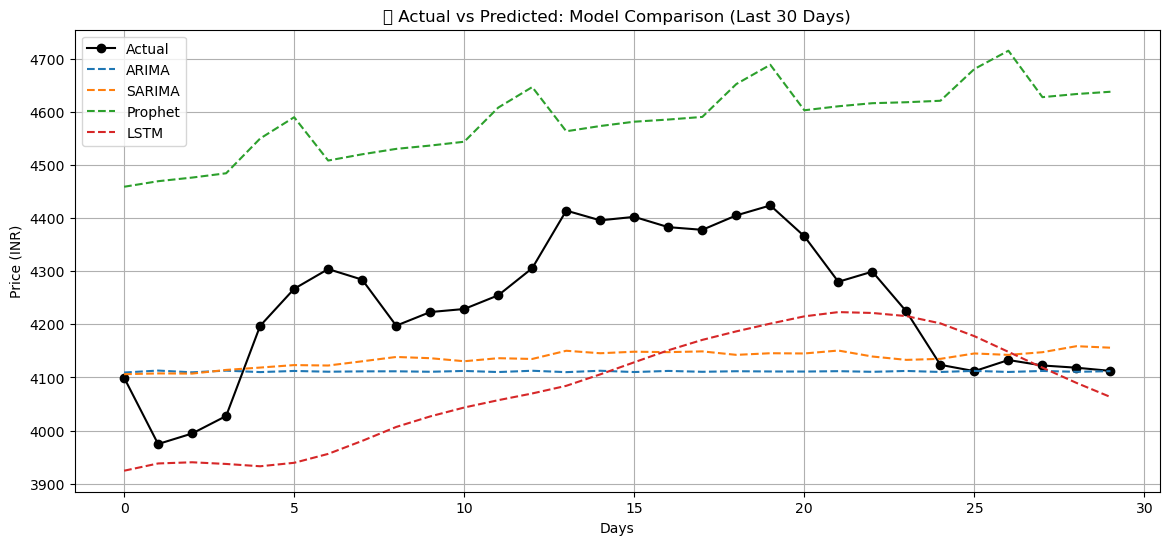

In [138]:
plt.figure(figsize=(14,6))
plt.plot(test_actual, label='Actual', marker='o', color='black')
plt.plot(arima_forecast, label='ARIMA', linestyle='--')
plt.plot(sarima_forecast, label='SARIMA', linestyle='--')
plt.plot(prophet_forecast, label='Prophet', linestyle='--')
plt.plot(lstm_forecast, label='LSTM', linestyle='--')
plt.title("📈 Actual vs Predicted: Model Comparison (Last 30 Days)")
plt.xlabel("Days")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [140]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, lstm_rmse],
    'MAE': [arima_mae, sarima_mae, prophet_mae, lstm_mae],
    'MAPE': [arima_mape, sarima_mape, prophet_mape, lstm_mape]
})

comparison_df.round(2)

,Model,RMSE,MAE,MAPE
0,ARIMA,178.84,147.07,3.41
1,SARIMA,157.20,132.29,3.08
2,Prophet,370.78,349.14,8.33
3,LSTM,195.44,163.86,3.82


In [144]:
!pip install streamlit

2025-06-22 22:16:24.428 
  command:

    streamlit run C:\Users\ADMIN\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

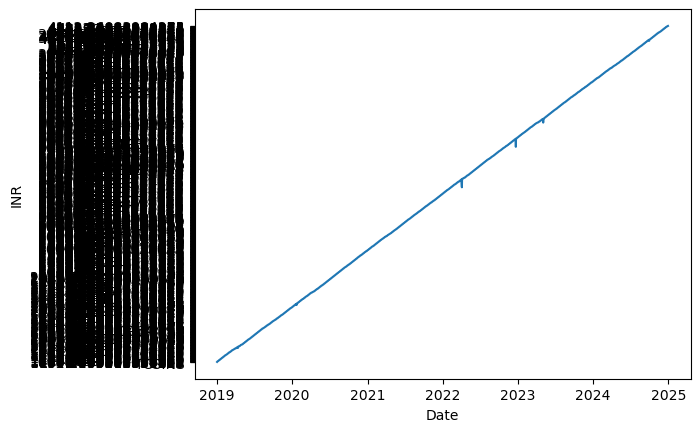

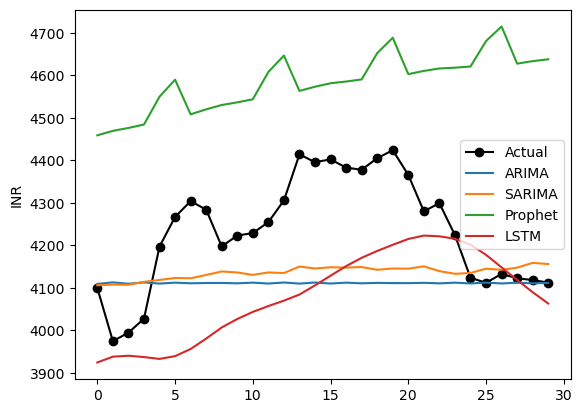

In [154]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/tcs_stock.csv', parse_dates=['Date'])

st.title("TCS Stock Forecast Dashboard")
st.markdown("Using ARIMA, SARIMA, Prophet, LSTM")

# Plot actual closing price
st.subheader("TCS Historical Closing Prices")
fig1, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Close'], label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("INR")
st.pyplot(fig1)

# Show Model Metrics
st.subheader("Model Comparison (Metrics)")

metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, lstm_rmse],
    'MAE': [arima_mae, sarima_mae, prophet_mae, lstm_mae],
    'MAPE': [arima_mape, sarima_mape, prophet_mape, lstm_mape]
})

st.dataframe(metrics_df.round(2))

# Plot Predictions
st.subheader("Model Predictions (Last 30 Days)")
fig2, ax2 = plt.subplots()
ax2.plot(test_actual, label='Actual', color='black', marker='o')
ax2.plot(arima_forecast, label='ARIMA')
ax2.plot(sarima_forecast, label='SARIMA')
ax2.plot(prophet_forecast, label='Prophet')
ax2.plot(lstm_forecast, label='LSTM')
ax2.set_ylabel("INR")
ax2.legend()
st.pyplot(fig2)

st.markdown("Built by Maguvarshini M – AI & Data Science Student")